# **Parkinsons classification using XGBoost and GridSearchCV**

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path=r'drive/My Drive/Datasets/Parkinsons/parkinsons_data.csv'

In [ ]:
df=pd.read_csv(path)
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# **Title: Parkinsons Disease Data Set**

### **Abstract: Oxford Parkinson's Disease Detection Dataset** 

### **Data Set Characteristics:** 
Multivariate

Number of Instances: 197

Area: Life

Attribute Characteristics: Real

Number of Attributes: 23

Date Donated: 2008-06-26

Associated Tasks: Classification

Missing Values? N/A

### **Source:**

The dataset was created by Max Little of the University of Oxford, in
collaboration with the National Centre for Voice and Speech, Denver,
Colorado, who recorded the speech signals. The original study published the
feature extraction methods for general voice disorders.

### **Data Set Information:**

This dataset is composed of a range of biomedical voice measurements from
31 people, 23 with Parkinson's disease (PD). Each column in the table is a
particular voice measure, and each row corresponds one of 195 voice
recording from these individuals ("name" column). The main aim of the data
is to discriminate healthy people from those with PD, according to "status"
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an
instance corresponding to one voice recording. There are around six
recordings per patient, the name of the patient is identified in the first
column.For further information or to pass on comments, please contact Max
Little (littlem '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this
dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008),
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease',
IEEE Transactions on Biomedical Engineering (to appear).

### **Attribute Information:**

Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA -Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

### **EDA**

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df=df.drop(labels='name',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


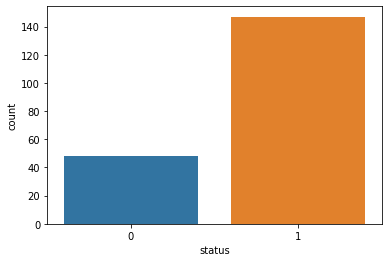

In [ ]:
import matplotlib.pyplot as plt
sns.countplot(df['status'])
plt.show()

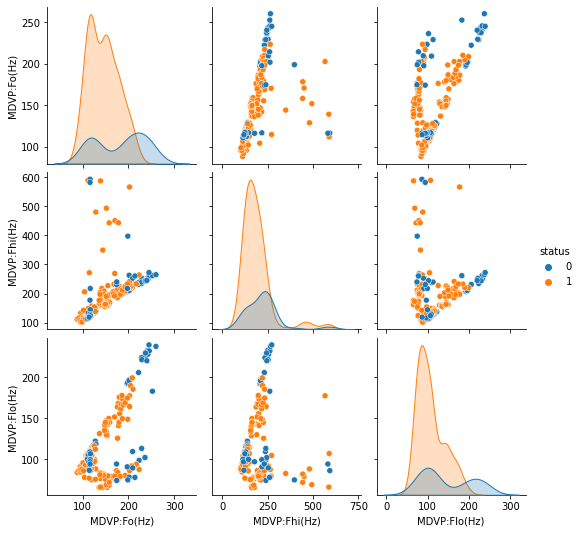

In [ ]:
vr=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']
sns.pairplot(df, hue="status",vars=vr)

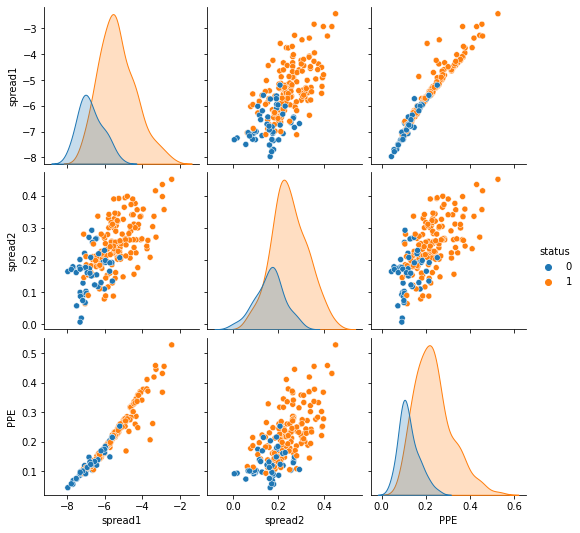

In [ ]:
vr=['spread1','spread2','PPE']
sns.pairplot(df, hue="status",vars=vr)

In [ ]:
y=df['status']
x=df.drop('status',axis=1)

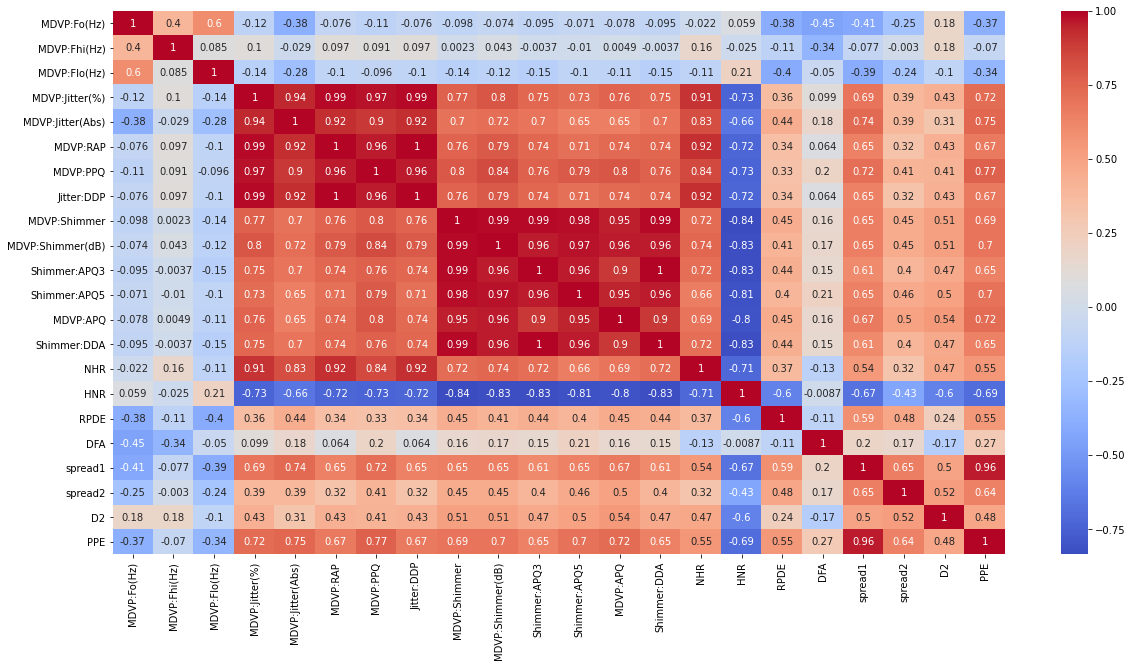

In [ ]:

plt.figure(figsize=(20,10))
sns.heatmap(x.corr(),cmap='coolwarm',annot=True)
plt.show()

### **Preprocessing and training**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((0,1))
x=scaler.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is:',acc*100,'%')

Accuracy is: 94.87179487179486 %


### **GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'learning_rate':[0.5,0.1],
            'n_estimators':[100,1000],
            'min_child_weight':[2],
            'max_depth':[3,4],
            'subsample':[1,0.8],
            'gamma':[1]}

In [ ]:
grid = GridSearchCV(XGBClassifier(seed=42), param_grid, refit = True, verbose = 3,return_train_score=True) 
  
est=grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1 
[CV]  gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1, score=(train=0.992, test=0.938), total=   0.0s
[CV] gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1 
[CV]  gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1, score=(train=0.984, test=0.839), total=   0.0s
[CV] gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1 
[CV]  gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1, score=(train=0.984, test=0.903), total=   0.0s
[CV] gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1 
[CV]  gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1, score=(train=0.984

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.8, score=(train=0.984, test=0.871), total=   0.0s
[CV] gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.8 
[CV]  gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.8, score=(train=0.984, test=0.935), total=   0.0s
[CV] gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=1000, subsample=1 
[CV]  gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=1000, subsample=1, score=(train=0.992, test=0.938), total=   0.2s
[CV] gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=1000, subsample=1 
[CV]  gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=1000, subsample=1, score=(train=0.984, test=0.839), total=   0.1s
[CV] gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=2, n_estimators=1000, subsample=1 
[CV]  gamma=1, learni

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.2s finished


In [ ]:
print(grid.best_params_) 
print(grid.best_estimator_)

{'gamma': 1, 'learning_rate': 0.5, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 1}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)


In [ ]:
pred_train=grid.predict(x_train)
predic=grid.predict(x_test)
scor=accuracy_score(y_test,predic)
scr=accuracy_score(y_train,pred_train)
print("Train Accuracy",scr*100,'%')
print("Test Accuracy",scor*100,'%')

Train Accuracy 98.71794871794873 %
Test Accuracy 94.87179487179486 %


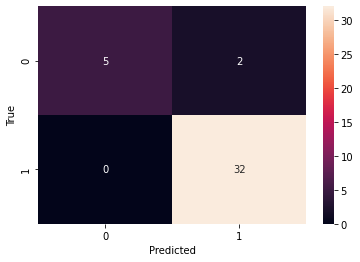

In [ ]:
cn=confusion_matrix(y_test, pred,labels=[0,1])
hn=sns.heatmap(cn,  annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [ ]:
pred_proba=grid.predict_proba(x_test)[:,1]

ROC-AUC score: 0.996


Text(0, 0.5, 'True Positive Rate')

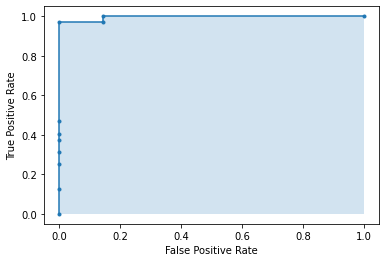

In [ ]:
fpr, tpr, threshold = roc_curve(y_test,pred_proba)
ar=auc(fpr,tpr)
print("ROC-AUC score: %.3f"%ar)
plt.plot(fpr, tpr,marker='.')
plt.fill_between(fpr,tpr,alpha=0.20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')